# 911 Calls Analysis Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [2]:
import seaborn as sns
%matplotlib inline

Read in the csv file as a dataframe called df 

In [3]:
df = pd.read_csv('911.csv')

Check the info() of the df 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


<h4><b>Dealing with the null value</b></h4>

In [5]:
df.isnull().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

In [6]:
df['zip'] = df['zip'].fillna(df.groupby('twp')['zip'].transform('max'))

In [7]:
df.isnull().sum()

lat            0
lng            0
desc           0
zip          228
title          0
timeStamp      0
twp           43
addr         519
e              0
dtype: int64

<h4><b>Now total null values are 790 which we will drop directly</b></h4>

In [8]:
df.shape

(99492, 9)

In [9]:
df = df.dropna()

In [10]:
df.shape

(98744, 9)

In [11]:
df.isnull().sum()

lat          0
lng          0
desc         0
zip          0
title        0
timeStamp    0
twp          0
addr         0
e            0
dtype: int64

In [12]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19464.0,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

What are the top 5 zipcodes from which most 911 calls recived? 

In [13]:
df['zip'].value_counts().head()

19464.0    7063
19401.0    6977
19403.0    5121
19446.0    4918
19428.0    4095
Name: zip, dtype: int64

What are the top 5 townships (twp) from which most 911 calls recived? 

In [14]:
df['twp'].value_counts().head()

LOWER MERION    8424
ABINGTON        5959
NORRISTOWN      5877
UPPER MERION    5203
CHELTENHAM      4549
Name: twp, dtype: int64

How many unique title codes are there? 

In [15]:
df['title'].nunique()

110

## Creating new features

In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. We will create a new column called "Reason" that contains this string value. 

For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.

In [16]:
reson=[]
def reasons(x):
    reson.append(x.split(':')[0])
df['title'].apply(reasons)
df['reason'] = reson
df['reason'].head()
    

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: reason, dtype: object

What is the most common Reason for a 911 call based off of this new column? 

In [17]:
df['reason'].value_counts()

EMS        48740
Traffic    35143
Fire       14861
Name: reason, dtype: int64

create a countplot of 911 calls by Reason.

<AxesSubplot:xlabel='reason', ylabel='count'>

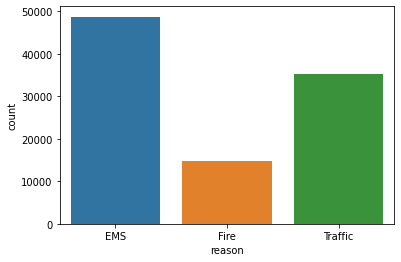

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x ='reason',data= df)

In [19]:
type(df['timeStamp'].iloc[0])

str

**We will create 3 new columns called Hour, Month, and Day of Week based off of the timeStamp column.**
**We will map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [20]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [21]:
days=[]
hours =[]
months =[]
dayofweek =[]
def hdmcol(x):
    days.append(x.day)
    hours.append(x.hour)
    months.append(x.month)
    dayofweek.append(x.dayofweek)
pd.to_datetime(df['timeStamp'])
df['timeStamp'].apply(hdmcol)
df['day'] = days
df['hour'] = hours
df['month'] = months
df['dayofweek'] = dayofweek
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['day_of_week'] = df['dayofweek'].map(dmap)
df.drop('dayofweek', inplace = True,axis =1)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,day,hour,month,day_of_week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,10,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,10,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,10,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,10,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19464.0,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,10,17,12,Thu


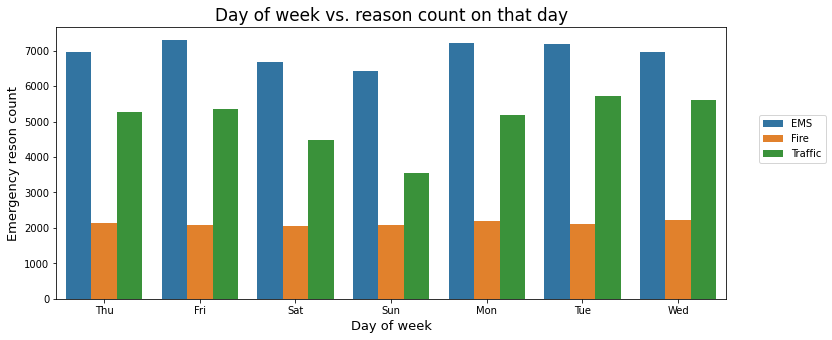

In [22]:
plt.figure(figsize=(12,5))
sns.countplot(x='day_of_week',data = df, hue = 'reason')
plt.title('Day of week vs. reason count on that day',fontsize=17)
plt.legend(loc=(1.05,0.5))
plt.ylabel('Emergency reson count',fontsize=13)
plt.xlabel('Day of week',fontsize=13);

**Now do the same for Month:**

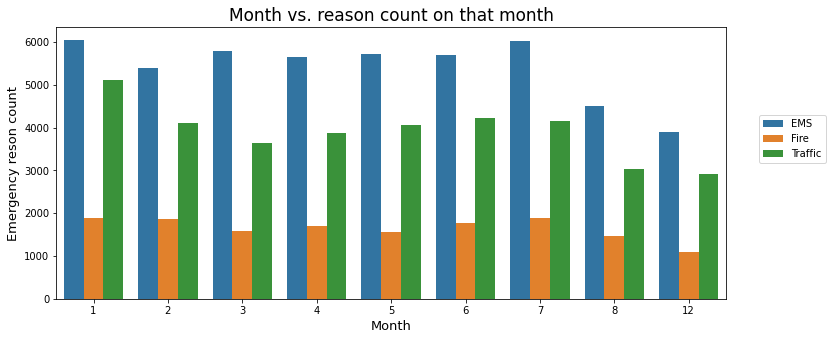

In [23]:
plt.figure(figsize=(12,5))
sns.countplot(x='month',data=df,hue='reason')
plt.title('Month vs. reason count on that month',fontsize=17)
plt.legend(loc=(1.05,0.5))
plt.ylabel('Emergency reson count',fontsize=13)
plt.xlabel('Month',fontsize=13);

<h4><b>what are the emergency reason count in day and night?</b></h4>
<ul>
    <li>For day hour = 7 - 19</li>
    <li>For night hour = 00-6 and 18-00</li>
</ul>

In [24]:
def day_night(x):
    if x in range(7,20):
        return 'Day hour'
    elif x in range(0,7):
        return 'Night hour'
    else:
        return 'Night hour'

In [25]:
df['day_night']=df['hour'].apply(day_night)

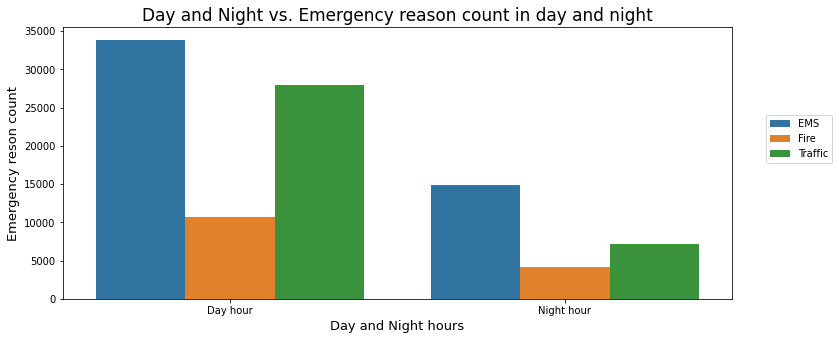

In [26]:
plt.figure(figsize=(12,5))
sns.countplot(x='day_night',data=df,hue='reason')
plt.title('Day and Night vs. Emergency reason count in day and night',fontsize=17)
plt.legend(loc=(1.05,0.5))
plt.ylabel('Emergency reson count',fontsize=13)
plt.xlabel('Day and Night hours',fontsize=13);

<h4><b>Township with most Fire emergency</b></h4>

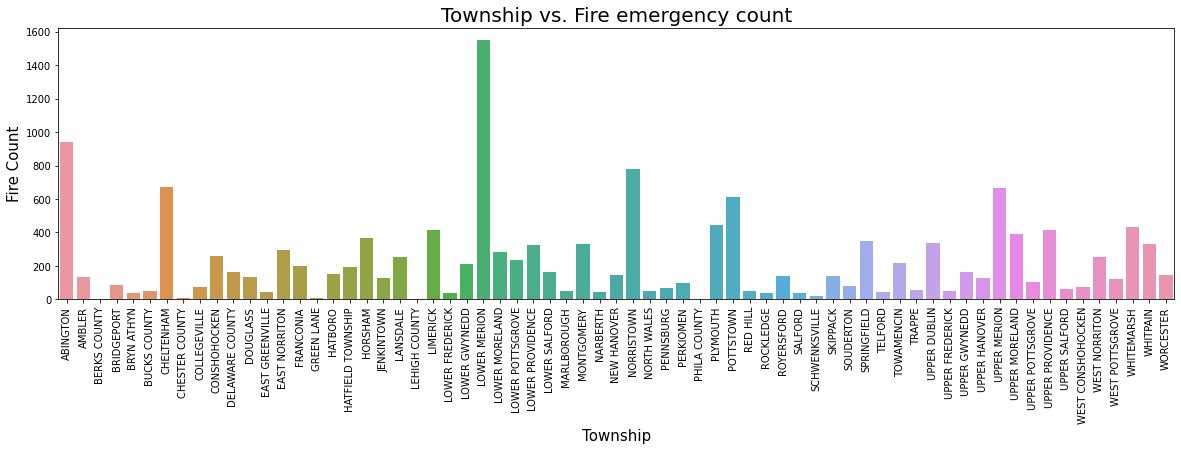

In [27]:
plt.figure(figsize=(20,5))
sns.countplot(x='twp',data=df[df['reason']=='Fire'].sort_values(by='twp'))
plt.title('Township vs. Fire emergency count',fontsize=20)
plt.ylabel('Fire Count',fontsize=15)
plt.xlabel('Township',fontsize=15)
plt.xticks(rotation=90);

<h4><b>Lower merion has most Fire emergencies</b></h4>

<h4><b>Township with most EMS emergency</b></h4>

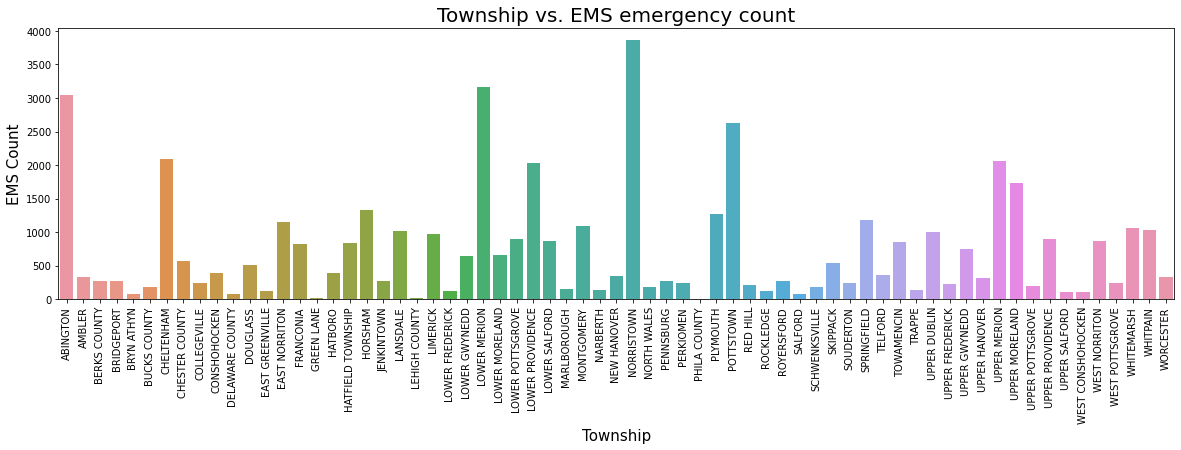

In [28]:
plt.figure(figsize=(20,5))
sns.countplot(x='twp',data=df[df['reason']=='EMS'].sort_values(by='twp'))
plt.title('Township vs. EMS emergency count',fontsize=20)
plt.ylabel('EMS Count',fontsize=15)
plt.xlabel('Township',fontsize=15)
plt.xticks(rotation=90);

<h4><b>Norristown has most EMS emergencies</b></h4>

<h4><b>Township with most Traffic emergency</b></h4>

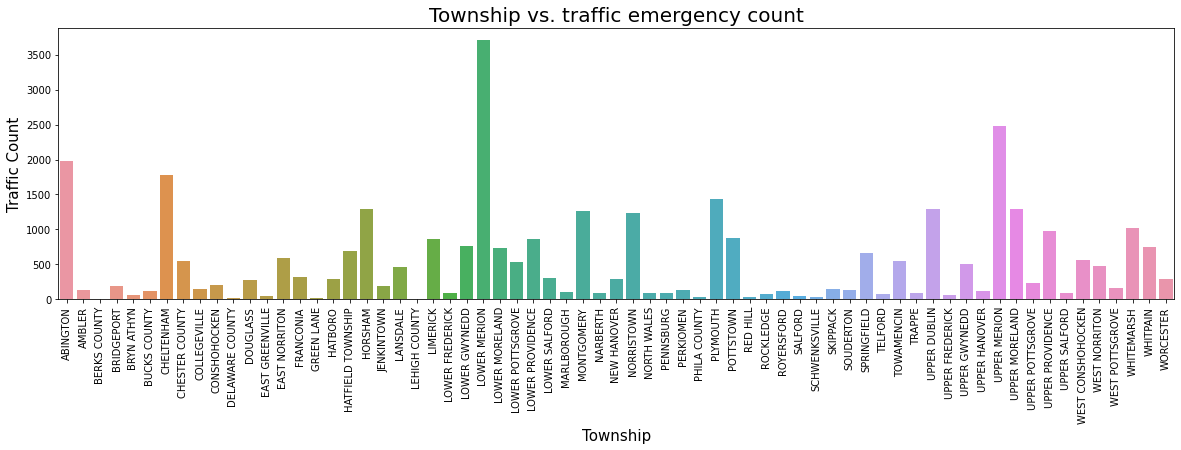

In [29]:
plt.figure(figsize=(20,5))
sns.countplot(x='twp',data=df[df['reason']=='Traffic'].sort_values(by='twp'))
plt.title('Township vs. traffic emergency count',fontsize=20)
plt.ylabel('Traffic Count',fontsize=15)
plt.xlabel('Township',fontsize=15)
plt.xticks(rotation=90);

<h4><b>Lower Merion has most traffic emergencies</b></h4>

**Create a new column called 'Date' that contains the date from the timeStamp column.** 

In [30]:
def date(x):
    return x.date()
df['date'] = df['timeStamp'].apply(date)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,day,hour,month,day_of_week,day_night,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,10,17,12,Thu,Day hour,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,10,17,12,Thu,Day hour,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,10,17,12,Thu,Day hour,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,10,17,12,Thu,Day hour,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19464.0,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,10,17,12,Thu,Day hour,2015-12-10


**We will plot 3 separate plots with each plot representing a Reason for the 911 calls grouping dates**

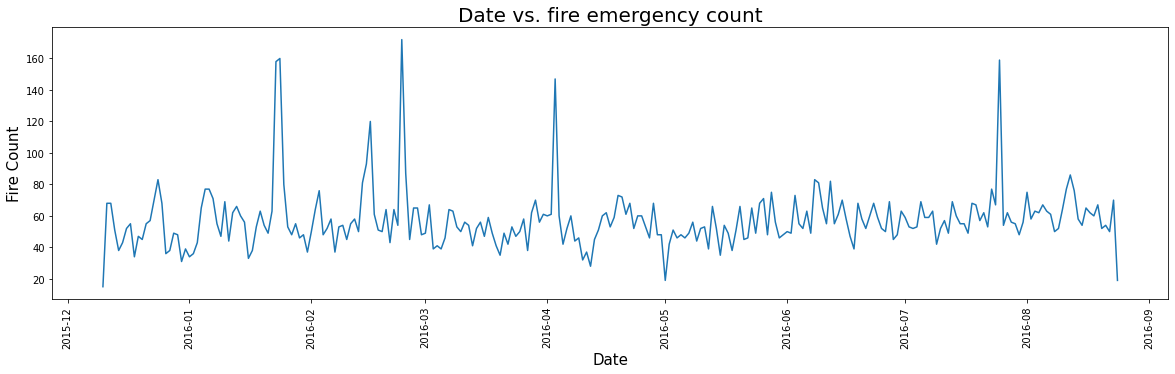

In [31]:
plt.figure(figsize=(20,5))
df[df['reason']=='Fire'].groupby('date').count()['twp'].plot()
plt.title('Date vs. fire emergency count',fontsize=20)
plt.ylabel('Fire Count',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.xticks(rotation=90);

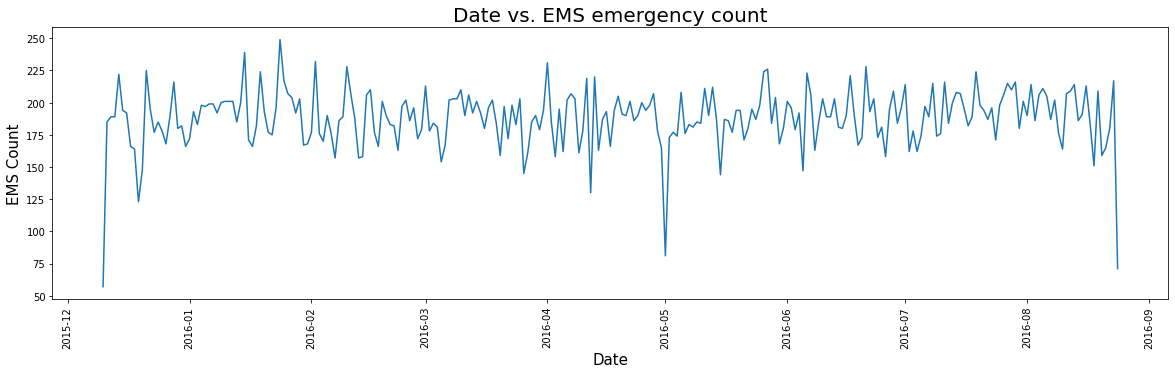

In [32]:
plt.figure(figsize=(20,5))
df[df['reason']=='EMS'].groupby('date').count()['twp'].plot()
plt.title('Date vs. EMS emergency count',fontsize=20)
plt.ylabel('EMS Count',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.xticks(rotation=90);

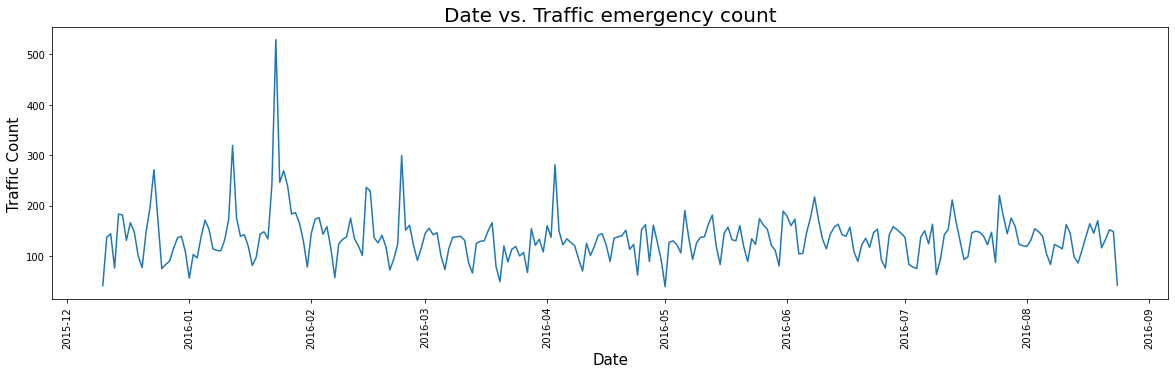

In [33]:
plt.figure(figsize=(20,5))
df[df['reason']=='Traffic'].groupby('date').count()['twp'].plot()
plt.title('Date vs. Traffic emergency count',fontsize=20)
plt.ylabel('Traffic Count',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.xticks(rotation=90);

**Lets see the emergency count on specific day in specific time frame**

In [34]:
data1 = df.groupby(by=['day_of_week','hour']).count()['reason'].unstack()
data1

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
Fri,273,232,190,175,200,194,369,593,734,746,...,925,975,1035,967,813,691,664,552,512,468
Mon,282,220,199,194,203,265,397,650,817,783,...,862,904,983,990,880,740,609,490,466,322
Sat,369,300,262,257,224,230,257,389,457,629,...,783,788,835,750,774,688,621,565,499,461
Sun,381,302,284,266,241,240,297,401,481,615,...,681,690,658,712,663,650,531,459,415,328
Thu,278,199,227,159,182,202,361,566,772,823,...,871,960,932,1005,808,690,614,550,423,353
Tue,268,240,186,170,209,239,411,652,879,867,...,932,930,1015,1008,897,722,646,562,459,273
Wed,248,216,187,207,155,253,408,691,871,805,...,894,862,982,1022,890,680,660,571,484,334


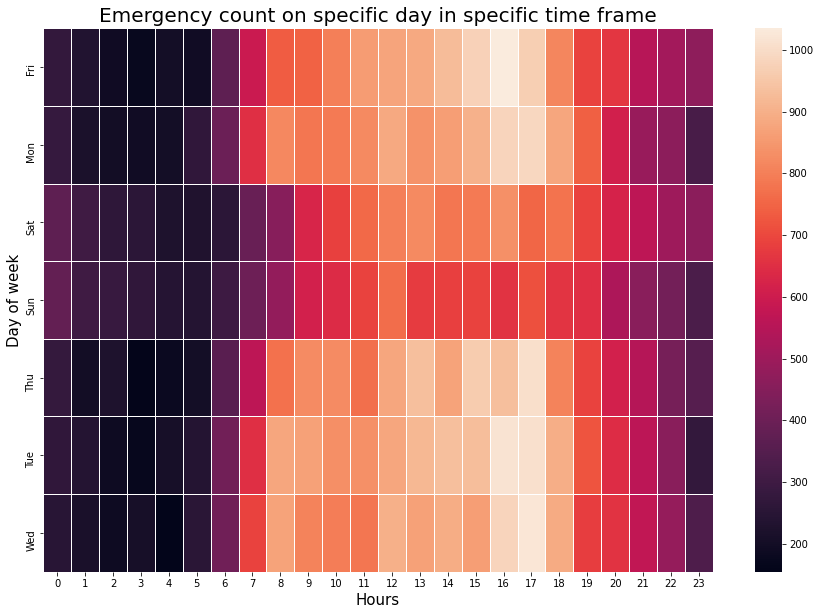

In [35]:
plt.figure(figsize=(15,10))
sns.heatmap(data1,linewidths=1)
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Day of week',fontsize=15)
plt.title('Emergency count on specific day in specific time frame',fontsize=20);

<h4><b>It is clerly seen that most of the emergency occurs during day hours for each day of the week except on weekend it is less than any other day</b></h4>